In [ ]:
# Simple for loop to check if python3 is working.
for x in range(1, 5):  # If you ever see xrange, you are in Python 2
    print(x)  # If you ever see print x (no parenthesis), you are in Python 2

1
2
3
4


In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


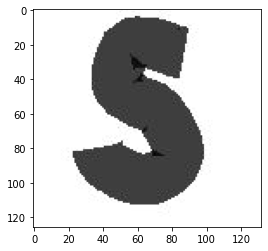

In [11]:
#https://www.youtube.com/watch?v=j-3vuBynnOE

#pip install opencv-pythonimport tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2

DATADIR = "/content/drive/My Drive/Colab Notebooks/PandS/"
#CATEGORIES = ["O", "Other"]
CATEGORIES = ["P", "S"]
#CATEGORIES = ["X"]
#CATEGORIES = ["X", "Other"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap="gray")
        except Exception as e:
            pass


In [3]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

ItoAI_S21_HW4_v4.ipynb	PandS


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

#DATADIR = "./train/"
#CATEGORIES = ["Jibril", "Sulayman"]
#DATADIR = "./XandO/"
#CATEGORIES = ["X", "O"]
#DATADIR = "./kagglecatsanddogs_3367a/PetImages"
#DATADIR = "./kagglecatsanddogs_small/PetImages"
#CATEGORIES = ["Dog", "Cat"]


IMG_SIZE = 50

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

random.shuffle(training_data)

for sample in training_data:
    print(sample[1])

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y = np.array(Y)
X = X/255.0
#print (X)

40
0
1
0
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
0
0
1
0
0
1


X.shape= (40, 50, 50, 1)
x_train.shape= (28, 50, 50, 1)
y_train.shape= (28,)
x_test.shape= (12, 50, 50, 1)
y_test.shape= (12,)
Epoch 1/10
28/28 [==============================] - 1s 12ms/step - loss: 1.1979 - accuracy: 0.5991 - val_loss: 0.6653 - val_accuracy: 0.6667
Epoch 2/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.4588 - val_loss: 0.6307 - val_accuracy: 0.6667
Epoch 3/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5620 - accuracy: 0.6816 - val_loss: 0.4327 - val_accuracy: 0.8333
Epoch 4/10
28/28 [==============================] - 0s 6ms/step - loss: 0.2594 - accuracy: 0.9921 - val_loss: 0.3647 - val_accuracy: 0.8333
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 0.1215 - accuracy: 0.9874 - val_loss: 0.1402 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============

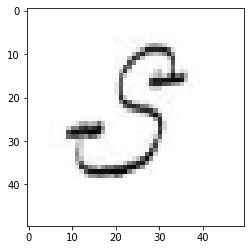

[99.74814] %
Image -->  2 



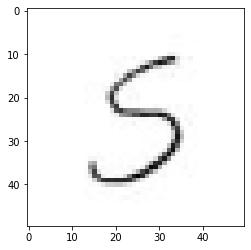

[99.99891] %
Image -->  3 



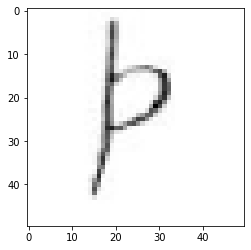

[2.718267] %
Image -->  4 



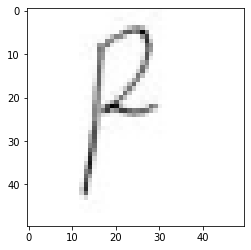

[5.946481] %
Image -->  5 



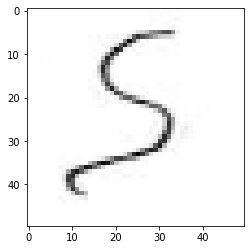

[99.85179] %
Image -->  6 



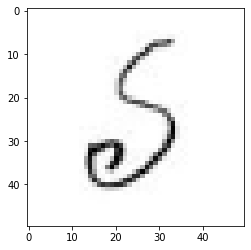

[99.99953] %
Image -->  7 



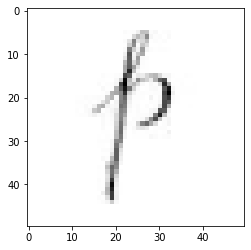

[48.308567] %
Image -->  8 



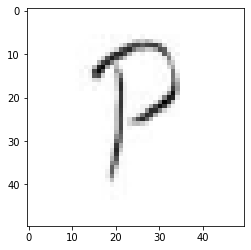

[1.3096511] %
Image -->  9 



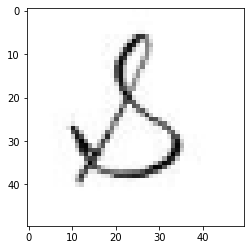

[99.99814] %
Image -->  10 



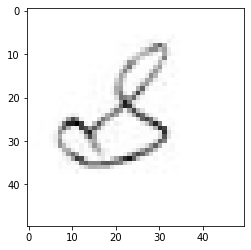

[94.69344] %
Image -->  11 



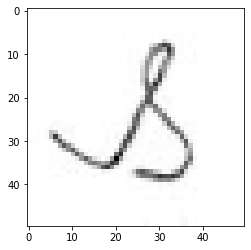

[99.98238] %
Image -->  12 



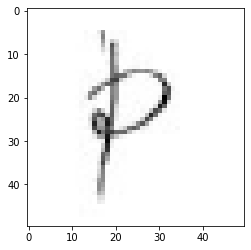

[0.49289465] %


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.

model = Sequential()

model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(14,(3,3)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=1,epochs=10,validation_data=(x_test,y_test),verbose=1)

'''

4 epochs were needed for the accuracy to converge. All the images were classified correctly except 1 p
that p had 50% accuracy (varies with different runs... mostly 50%... this time 48%)
it was not accurately classified because it had an s like curve on its head but the body of p.
so the agent wasnt sure if it is a p or an s that justifies the 50% result

'''



constt=0
prediction=model.predict(x_test)
x_test = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE)
for img in x_test:
  print("Image --> ", constt+1,"\n")
  plt.imshow(img,cmap="gray")
  plt.show()
  print(prediction[constt]*100,"%")
  constt+=1


X.shape= (40, 50, 50, 1)
x_train.shape= (28, 50, 50, 1)
y_train.shape= (28,)
x_test.shape= (12, 50, 50, 1)
y_test.shape= (12,)
Epoch 1/10
7/7 [==============================] - 1s 41ms/step - loss: 0.8393 - accuracy: 0.4692 - val_loss: 0.5844 - val_accuracy: 0.5833
Epoch 2/10
7/7 [==============================] - 0s 17ms/step - loss: 0.6170 - accuracy: 0.7092 - val_loss: 0.5462 - val_accuracy: 0.7500
Epoch 3/10
7/7 [==============================] - 0s 17ms/step - loss: 0.4238 - accuracy: 0.8659 - val_loss: 0.4201 - val_accuracy: 0.9167
Epoch 4/10
7/7 [==============================] - 0s 18ms/step - loss: 0.2884 - accuracy: 1.0000 - val_loss: 0.3353 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 17ms/step - loss: 0.2163 - accuracy: 1.0000 - val_loss: 0.2588 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 18ms/step - loss: 0.1436 - accuracy: 1.0000 - val_loss: 0.2355 - val_accuracy: 0.9167
Epoch 7/10
7/7 [=======================

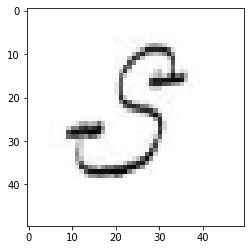

[85.17297] %
Image -->  2 



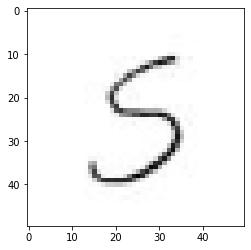

[98.98212] %
Image -->  3 



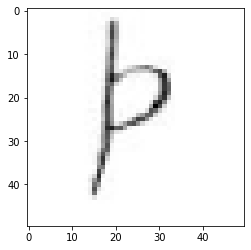

[6.4242363] %
Image -->  4 



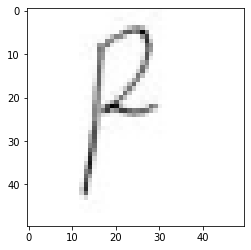

[9.98843] %
Image -->  5 



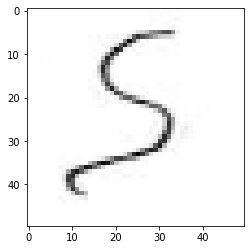

[89.719925] %
Image -->  6 



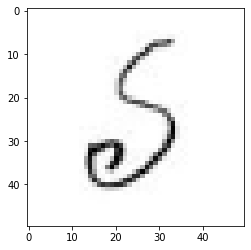

[99.84759] %
Image -->  7 



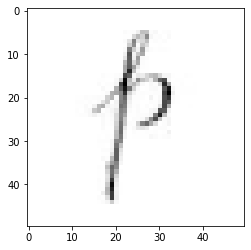

[31.551699] %
Image -->  8 



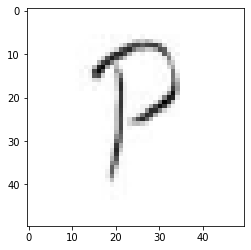

[3.9642544] %
Image -->  9 



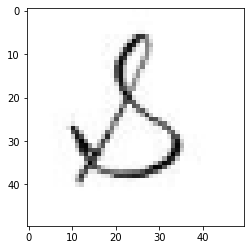

[99.25151] %
Image -->  10 



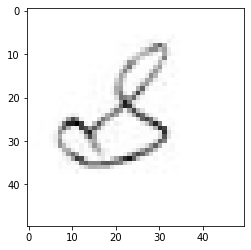

[80.25898] %
Image -->  11 



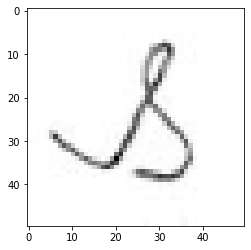

[97.04775] %
Image -->  12 



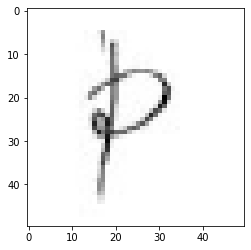

[2.9096694] %


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.


model = Sequential()

model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(14,(3,3)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=4,epochs=10,validation_data=(x_test,y_test),verbose=1)

'''

changed the acttivation function from relu --> tanh
changed the batch size from 1 to 4
results had a peculiar change
val accuracy kept converging and diverging to and from 1 with further epochs
but the accuracy converged to 1 with one less epoch
same image of still had 50%(approx) accuracy
it still changes with different runs but mostly 50%
rest of all the s and p were correctly classified 


'''

constt=0
prediction=model.predict(x_test)
x_test = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE)
for img in x_test:
  print("Image --> ", constt+1,"\n")
  plt.imshow(img,cmap="gray")
  plt.show()
  print(prediction[constt]*100,"%")
  constt+=1


X.shape= (40, 50, 50, 1)
x_train.shape= (28, 50, 50, 1)
y_train.shape= (28,)
x_test.shape= (12, 50, 50, 1)
y_test.shape= (12,)
Epoch 1/10
28/28 [==============================] - 1s 12ms/step - loss: 1.1600 - accuracy: 0.5967 - val_loss: 0.7047 - val_accuracy: 0.4167
Epoch 2/10
28/28 [==============================] - 0s 7ms/step - loss: 0.7071 - accuracy: 0.3348 - val_loss: 0.6853 - val_accuracy: 0.9167
Epoch 3/10
28/28 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.7429 - val_loss: 0.6259 - val_accuracy: 0.8333
Epoch 4/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5736 - accuracy: 0.9117 - val_loss: 0.5638 - val_accuracy: 0.9167
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5056 - accuracy: 0.9891 - val_loss: 0.4318 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.9643 - val_loss: 0.2911 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============

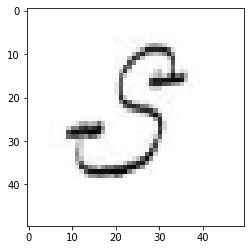

[74.770065] %
Image -->  2 



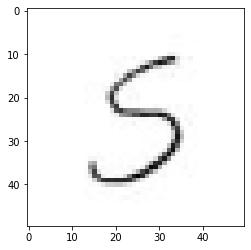

[99.008514] %
Image -->  3 



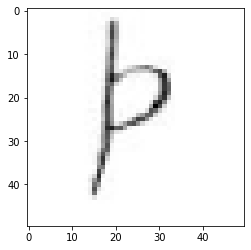

[8.135051] %
Image -->  4 



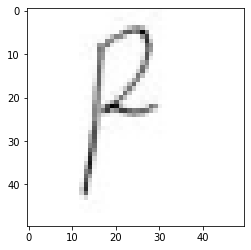

[16.830168] %
Image -->  5 



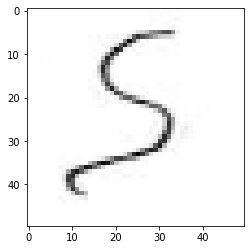

[87.43132] %
Image -->  6 



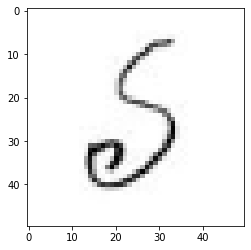

[99.064026] %
Image -->  7 



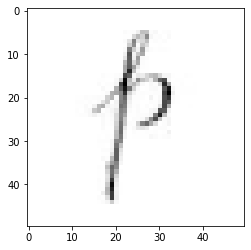

[38.315777] %
Image -->  8 



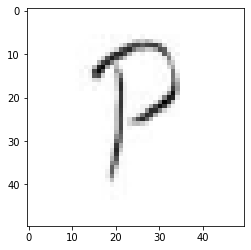

[3.1710835] %
Image -->  9 



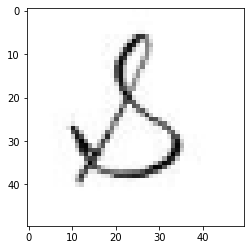

[97.42397] %
Image -->  10 



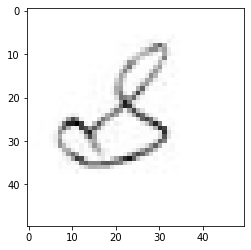

[75.9165] %
Image -->  11 



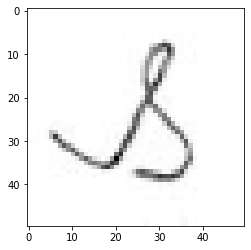

[96.62319] %
Image -->  12 



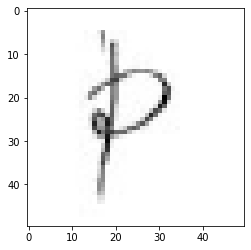

[3.6053956] %


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.

model = Sequential()

model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(14,(3,3)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=1,epochs=10,validation_data=(x_test,y_test),verbose=1)

'''
Imported AveragePooling2D layer 
replaced maxpooling with average pooling 
results were not so great
it took 10 epochs for accuracy to converge at 1 
val accuracy converged at 1 at 7th epoch
the results are not good as compared to other CNNs
results are less accurate for several images
one of the s is only 73% and one was 80% accurate which is very less relatively
same with some other images
the p that wasbt accurately identified in other CNNs(had around 50% accurate prediction) had slightly better(38%) prediction
but i think that was just lucky 

'''



constt=0
prediction=model.predict(x_test)
x_test = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE)
for img in x_test:
  print("Image --> ", constt+1,"\n")
  plt.imshow(img,cmap="gray")
  plt.show()
  print(prediction[constt]*100,"%")
  constt+=1
